# Fittings for volatile solubilities

In [1]:
import pandas as pd
import numpy as np

from atmodeller import GAS_CONSTANT, logger

09:50:40 - atmodeller           - INFO      - atmodeller version 0.1.0


In [2]:
#Import plotting tools:

import matplotlib
import matplotlib.pyplot as plt
plt.rc("savefig", dpi=300)
plt.rc('figure', dpi=300)
plt.rc('text', usetex=True)
plt.rc('font', size=15)
plt.rc('xtick', direction='in') 
plt.rc('ytick', direction='in')
plt.rc('xtick.major', pad=5) 
plt.rc('xtick.minor', pad=5)
plt.rc('ytick.major', pad=5) 
plt.rc('ytick.minor', pad=5)
plt.rc('lines', dotted_pattern = [0.5, 1.1])

font={'weight':'bold',
     'size': 15}
matplotlib.rc('font', **font)
plt.rcParams["figure.figsize"] = (7,5)

# H2 Solubility

### Fitting to the H2 solubility data of Fig. 5 Hirschmann+2012

In [39]:
def least_squares_fitH2(composition:str):
    """Fit H2 solubility data from Hirschmann+2012 as a function of pressure
    
    Args:
        composition. The composition of the melt 

    Returns:
        The least-squares fit coefficients.
    """
    datafile: str = f"data/solubility_data/H2/H2Sol_{composition}_Fig5.csv"
    df:pd.DataFrame = pd.read_csv(datafile, names=('P_GPa', 'H2_ppm'))
    # Least squares fitting.
    pressure: np.ndarray = df['P_GPa'].to_numpy()
    H2_arr: np.ndarray = df['H2_ppm'].to_numpy()
    design_matrix: np.ndarray = pressure[:, np.newaxis]**[1, 0]
    #print('design matrix:', design_matrix)
    solution, _, _, _ = np.linalg.lstsq(design_matrix, H2_arr, rcond=None)

    return solution

def poly_fitH2(composition:str):
    datafile: str = f"data/solubility_data/H2/H2Sol_{composition}_Fig5.csv"
    df:pd.DataFrame = pd.read_csv(datafile, names=('P_GPa', 'H2_ppm'))
    # Least squares fitting.
    pressure: np.ndarray = df['P_GPa'].to_numpy()
    H2_arr: np.ndarray = df['H2_ppm'].to_numpy()
    coeffs = np.polyfit(pressure, H2_arr, deg=2)
    #poly = np.poly1d(coeffs)

    #pfit = lambda pressure: 10**(poly(np.log10(pressure)))
    return coeffs 

def poly_fitH2_logscale(composition:str):
    datafile: str = f"data/solubility_data/H2/H2Sol_{composition}_Fig5.csv"
    df:pd.DataFrame = pd.read_csv(datafile, names=('P_GPa', 'H2_ppm'))
    # Least squares fitting.
    pressure: np.ndarray = df['P_GPa'].to_numpy()
    H2_arr: np.ndarray = df['H2_ppm'].to_numpy()
    logp = np.log10(pressure)
    logH2 = np.log10(H2_arr)
    coeffs = np.polyfit(logp, logH2, deg=2)
    #poly = np.poly1d(coeffs)

    #pfit = lambda pressure: 10**(poly(np.log10(pressure)))
    return coeffs 


#### Run the fit and test:

In [113]:
#Least squares fitting to a line:
#a_b, b_b = least_squares_fitH2("BasaltPureH2")

a_p_l, b_p_l = least_squares_fitH2("PeridotitePureH2")
print('Peridotite, Linear Fit:', a_p_l, b_p_l)
a_bIW, b_bIW = least_squares_fitH2("BasaltIW")

a_bIWp2, b_bIWp2 = least_squares_fitH2("BasaltIWp2")

a_bIWm2, b_bIWm2 = least_squares_fitH2("BasaltIWm2")

#Polynomial fitting:

a_b, b_b, c_b = poly_fitH2("BasaltPureH2")
print('Basalt, Poly Fit:', a_b, b_b, c_b)

a_p, b_p, c_p = poly_fitH2("PeridotitePureH2")
print('Peridotite, Poly Fit:', a_p, b_p, c_p)

a_b2, b_b2, c_b2 = poly_fitH2_logscale("BasaltPureH2")
print('Basalt Poly Fit on log scale:', a_b2, b_b2, c_b2)

Peridotite, Linear Fit: 1725.0205483263528 -10.522148110249578
Basalt, Poly Fit: 2098.549267158505 4453.086503397883 -1.0594548598994866
Peridotite, Poly Fit: 31.10688753142463 1696.7339726782197 -8.00216936485055
Basalt Poly Fit on log scale: 0.056486519518222804 1.196049072065023 3.8047213640913826


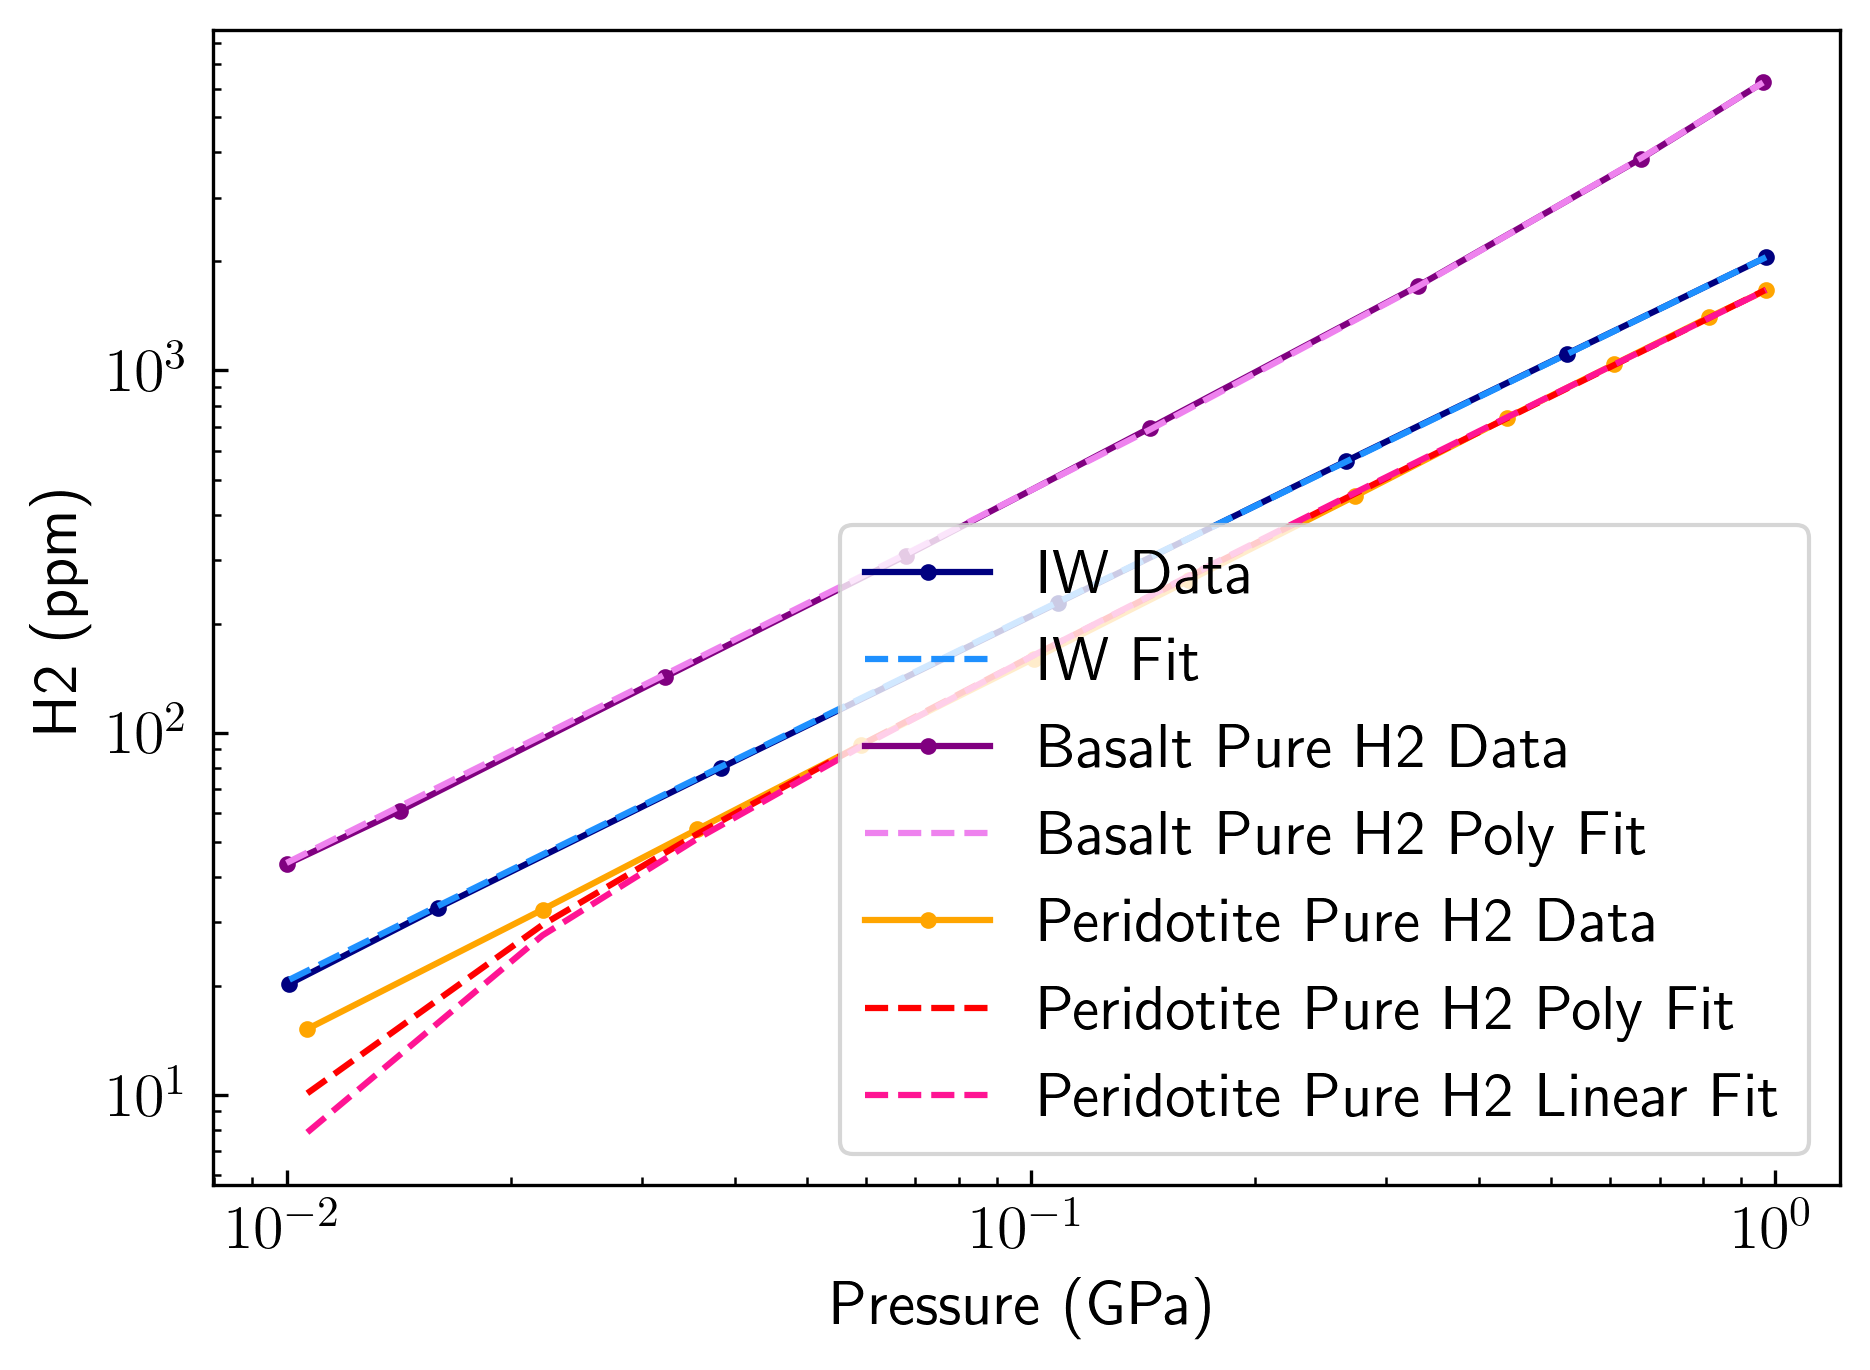

In [112]:
#Let's plot the data to see how the fit looks:
datafile_basaltH2: str = f"data/solubility_data/H2/H2Sol_BasaltPureH2_Fig5.csv"
df_basaltH2: pd.DataFrame = pd.read_csv(datafile_basaltH2, names=('P_GPa', 'H2_ppm'))

datafile_peridotiteH2: str = f"data/solubility_data/H2/H2Sol_PeridotitePureH2_Fig5.csv"
df_peridotiteH2: pd.DataFrame = pd.read_csv(datafile_peridotiteH2, names=('P_GPa', 'H2_ppm'))

datafile_basaltIW: str = f"data/solubility_data/H2/H2Sol_BasaltIW_Fig5.csv"
df_basaltIW:pd.DataFrame = pd.read_csv(datafile_basaltIW, names=('P_GPa', 'H2_ppm'))

datafile_basaltIWp2: str = f"data/solubility_data/H2/H2Sol_BasaltIWp2_Fig5.csv"
df_basaltIWp2:pd.DataFrame = pd.read_csv(datafile_basaltIWp2, names=('P_GPa', 'H2_ppm'))

datafile_basaltIWm2: str = f"data/solubility_data/H2/H2Sol_BasaltIWm2_Fig5.csv"
df_basaltIWm2:pd.DataFrame = pd.read_csv(datafile_basaltIWm2, names=('P_GPa', 'H2_ppm'))

fig, ax = plt.subplots()
plt.plot(df_basaltIW['P_GPa'], df_basaltIW['H2_ppm'], marker='.', color='navy', label='IW Data')
plt.plot(df_basaltIW['P_GPa'], (df_basaltIW['P_GPa']*a_bIW)+b_bIW, linestyle='--', color='dodgerblue', label='IW Fit')

#plt.plot(df_basaltIWp2['P_GPa'], df_basaltIWp2['H2_ppm'], marker='.', color='forestgreen', label='IW+2 Data')
#plt.plot(df_basaltIWp2['P_GPa'], (df_basaltIWp2['P_GPa']*a_bIWp2)+b_bIWp2, linestyle='--', color='green', label='IW+2 Fit')

#plt.plot(df_basaltIWm2['P_GPa'], df_basaltIWm2['H2_ppm'], marker='.', color='orange', label='IW-2 Data')
#plt.plot(df_basaltIWm2['P_GPa'], (df_basaltIWm2['P_GPa']*a_bIWm2)+b_bIWm2, linestyle='--', color='red', label='IW-2 Fit')

plt.plot(df_basaltH2['P_GPa'], df_basaltH2['H2_ppm'], marker='.', color='purple', label='Basalt Pure H2 Data')
plt.plot(df_basaltH2['P_GPa'], (a_b*(df_basaltH2['P_GPa'])**2)+(b_b*df_basaltH2['P_GPa'])+c_b, linestyle='--', color='violet', label='Basalt Pure H2 Poly Fit')

plt.plot(df_peridotiteH2['P_GPa'], df_peridotiteH2['H2_ppm'], marker='.', color='orange', label='Peridotite Pure H2 Data')
plt.plot(df_peridotiteH2['P_GPa'], (a_p*(df_peridotiteH2['P_GPa'])**2)+(b_p*df_peridotiteH2['P_GPa'])+c_p, linestyle='--', color='red', label='Peridotite Pure H2 Poly Fit')
plt.plot(df_peridotiteH2['P_GPa'], a_p_l*(df_peridotiteH2['P_GPa'])+b_p_l, linestyle='--', color='deeppink', label='Peridotite Pure H2 Linear Fit')

plt.xscale('log')
plt.yscale('log')
plt.xlabel('Pressure (GPa)')
plt.ylabel('H2 (ppm)')
plt.legend()
plt.show()


In [80]:
def least_squares_fitH2_PfO2(composition_fO2:list, fO2_offset:list):
    """Fit the H2 solubility data as a function of P and fO2
    
    Args:
        composition at a particular fO2

    Returns:
        The least-squares fit coefficients.
    """
    pressure_arr: np.ndarray = []
    H2_arr: np.ndarray=[]
    fO2offset_arr = np.ndarray = []

    for i,j in zip(composition_fO2, fO2_offset):
        datafile: str = f"data/solubility_data/H2/H2Sol_{i}_Fig5.csv"
        print(datafile)
        df: pd.DataFrame = pd.read_csv(datafile, names=('P_GPa', 'H2_ppm'))
        df['fO2relIW'] = j
        pressure: np.ndarray = df['P_GPa'].to_numpy()
        H2_val: np.ndarray = df['H2_ppm'].to_numpy()
        fO2offset_val: np.ndarray = df['fO2relIW'].to_numpy()
        pressure_arr.append(pressure)
        H2_arr.append(H2_val)
        fO2offset_arr.append(fO2offset_val)
    
    print('H2 Array:', H2_arr)
    design_matrix: np.ndarray = [pressure_arr, fO2offset_arr]
    print('design matrix:', design_matrix)
    #solution, _, _, _ = np.linalg.lstsq(design_matrix, H2_arr, rcond=None)

    return 0.0

15    120.984221
16    132.651591
17    144.318962
18    155.986332
19    167.653703
20    179.321074
21    190.988444
22    202.655815
23    214.323185
24    225.990556
25    237.657926
26    249.325297
27    260.992668
28    272.660038
29    284.327409
30    295.994779
Name: T(K), dtype: float64


### Fitting to Figure 4 of Hirschmann+2012

In [57]:
def least_squares_fH2(filename:str):
    """Fit H2 solubility data from Hirschmann+2012 as a function of pressure
    
    Args:
        composition. The composition of the melt 

    Returns:
        The least-squares fit coefficients.
    """
    datafile: str = f"data/solubility_data/H2/{filename}"
    df:pd.DataFrame = pd.read_csv(datafile, names=('P_GPa', 'fH2_bar'))
    # Least squares fitting.
    pressure: np.ndarray = df['P_GPa'].to_numpy()
    fH2_arr: np.ndarray = df['fH2_bar'].to_numpy()
    design_matrix: np.ndarray = pressure[:, np.newaxis]**[1, 0]
    #print('design matrix:', design_matrix)
    solution, _, _, _ = np.linalg.lstsq(design_matrix, fH2_arr, rcond=None)

    return solution

def polyfit_fH2(filename:str):
    datafile: str = f"data/solubility_data/H2/{filename}"
    df:pd.DataFrame = pd.read_csv(datafile, names=('P_GPa', 'fH2_bar'))
    # Least squares fitting.
    pressure: np.ndarray = df['P_GPa'].to_numpy()
    fH2_arr: np.ndarray = df['fH2_bar'].to_numpy()
    coeffs = np.polyfit(pressure, fH2_arr, deg=2)
    return coeffs 

In [93]:
a_fH2, b_fH2 = least_squares_fH2('H2Sol_fH2vsP.csv')
a_fH2_p, b_fH2_p, c_fH2_p = polyfit_fH2('H2Sol_fH2vsP.csv')

a_fH2_and, b_fH2_and = least_squares_fH2('H2Sol_fH2vsP_Andesite.csv')
a_fH2_pand, b_fH2_pand, c_fH2_pand = polyfit_fH2('H2Sol_fH2vsP_Andesite.csv')


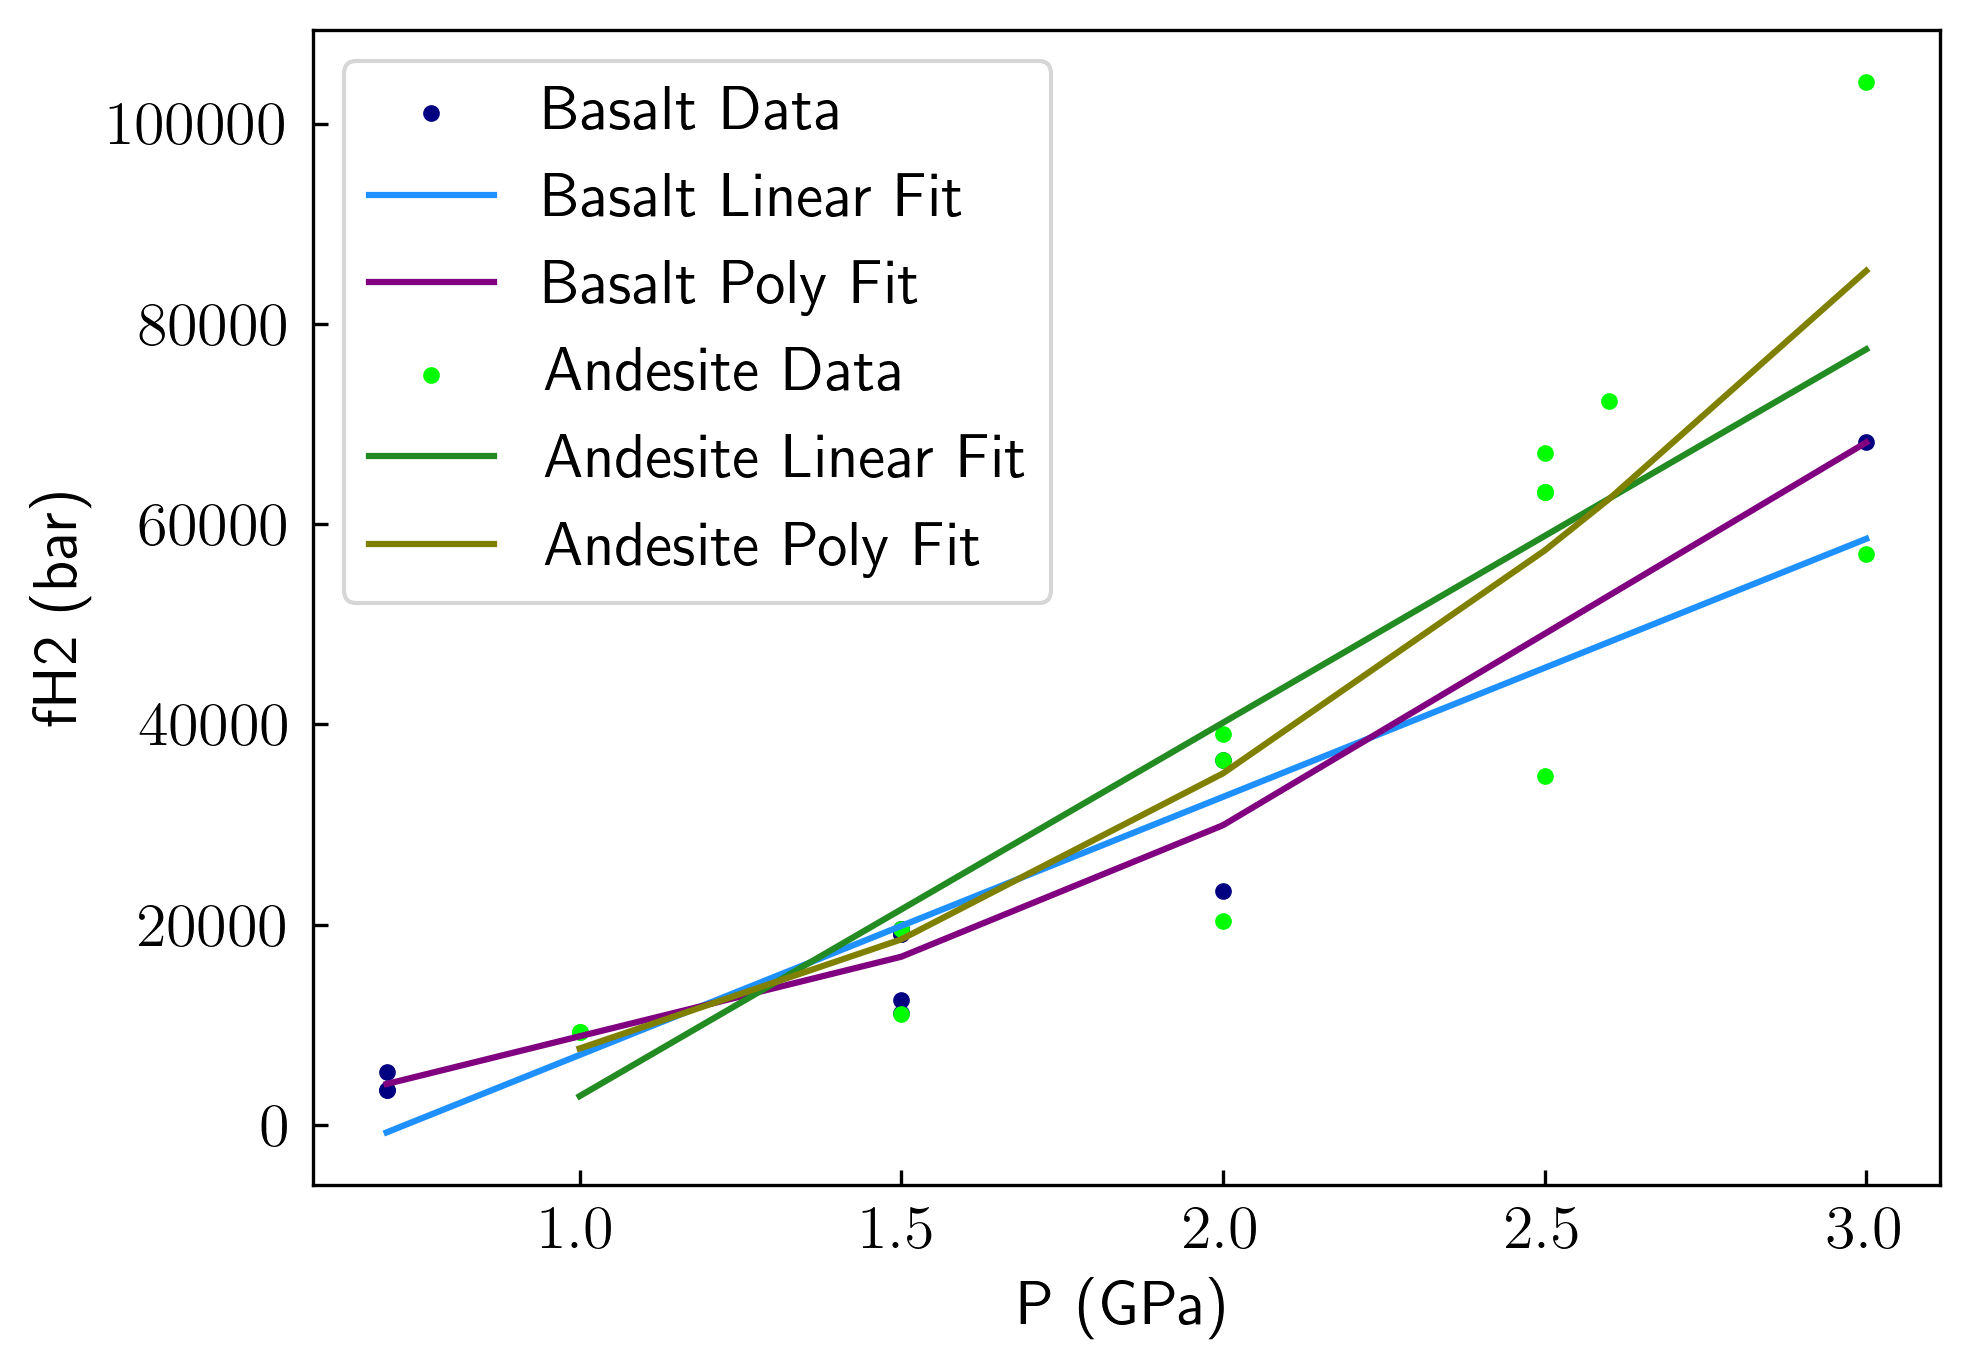

In [97]:
datafile_fH2: str = f"data/solubility_data/H2/H2Sol_fH2vsP.csv"
df_fH2: pd.DataFrame = pd.read_csv(datafile_fH2, names=('P_GPa', 'fH2_bar'))

datafile_fH2_and: str = f"data/solubility_data/H2/H2Sol_fH2vsP_Andesite.csv"
df_fH2_and: pd.DataFrame = pd.read_csv(datafile_fH2_and, names=('P_GPa', 'fH2_bar'))

fig,ax = plt.subplots()
plt.scatter(df_fH2.P_GPa, df_fH2.fH2_bar, marker='.', color='navy', label='Basalt Data')
plt.plot(df_fH2.P_GPa, (df_fH2.P_GPa*a_fH2)+b_fH2, color='dodgerblue', label='Basalt Linear Fit')
plt.plot(df_fH2.P_GPa, (a_fH2_p*(df_fH2.P_GPa)**2)+(b_fH2_p*df_fH2.P_GPa)+c_fH2_p, color='purple', label='Basalt Poly Fit')

plt.scatter(df_fH2_and.P_GPa, df_fH2_and.fH2_bar, marker='.', color='lime', label='Andesite Data')
plt.plot(df_fH2_and.P_GPa, (df_fH2_and.P_GPa*a_fH2_and)+b_fH2_and, color='forestgreen', label='Andesite Linear Fit')
plt.plot(df_fH2_and.P_GPa, (a_fH2_pand*(df_fH2_and.P_GPa)**2)+(b_fH2_pand*df_fH2_and.P_GPa)+c_fH2_pand, color='olive', label='Andesite Poly Fit')

plt.legend()
plt.ylabel('fH2 (bar)')
plt.xlabel('P (GPa)')
plt.show()



In [72]:
#Basalt Fit Parameters:
print(a_fH2_p, b_fH2_p, c_fH2_p)

print(a_fH2, b_fH2)

7977.1994887131905 -1667.9626392938358 1363.7546764214728
25766.171693735494 -18763.475638051073


In [98]:
#Andesite Fit Parameters:
print(a_fH2_pand, b_fH2_pand, c_fH2_pand)

print(a_fH2_and, b_fH2_and)

11356.1024251489 -6604.146770869993 2897.5700448704315
37281.77790469974 -34388.54667101824


In [104]:

def H2_HirschmannFig4(pressure: float) -> float:
    bar_to_GPa: float = 0.0001 #GPa/bar
    molefrac_to_ppm: float = 1e6 #ppm/molefrac
    pressure_GPa: float = pressure*bar_to_GPa
    fH2 = (7977.1995*(pressure_GPa**2)) - 1667.9626*pressure_GPa + 1363.7547 #bars; doing 2-degree polynomial fit
    #fH2 = (25766.1717*pressure_GPa) - 18763.4756
    #print('fH2:', fH2)
    molefrac: float = np.exp(-11.403-(0.76*pressure_GPa))*fH2
    ppm: float = molefrac* molefrac_to_ppm #CHECK, is there an extra step to make this ppmw?
    return ppm

fH2_try = H2_HirschmannFig4(15000)

def H2_HirschmannFig4_Andesite(pressure: float) -> float:
    bar_to_GPa: float = 0.0001 #GPa/bar
    molefrac_to_ppm: float = 1e6 #ppm/molefrac
    pressure_GPa: float = pressure*bar_to_GPa
    fH2 = (11356.1024*(pressure_GPa**2)) - 6604.1468*pressure_GPa + 2897.5700 #bars; doing 2-degree polynomial fit
    #fH2 = (37281.7779*pressure_GPa) - 34388.5467 #linear fit 
    #print('fH2:', fH2)
    molefrac: float = np.exp(-10.591-(0.81*pressure_GPa))*fH2
    ppm: float = molefrac* molefrac_to_ppm #CHECK, is there an extra step to make this ppmw?
    return ppm

fH2_andesite_try = H2_HirschmannFig4_Andesite(15000)

fH2: [  1363.7547     1276.730435   1349.25016    1581.313875   1972.92158
   2524.073275   3234.76896    4105.008635   5134.7923     6324.119955
   7672.9916     9181.407235  10849.36686   12676.870475  14663.91808
  16810.509675  19116.64526   21582.324835  24207.5484    26992.315955
  29936.6275    33040.483035  36303.88256   39726.826075  43309.31358
  47051.345075  50952.92056   55014.040035  59234.7035    63614.910955
  68154.6624    72853.957835  77712.79726   82731.180675  87909.10808
  93246.579475  98743.59486  104400.154235 110216.2576   116191.904955
 122327.0963  ]


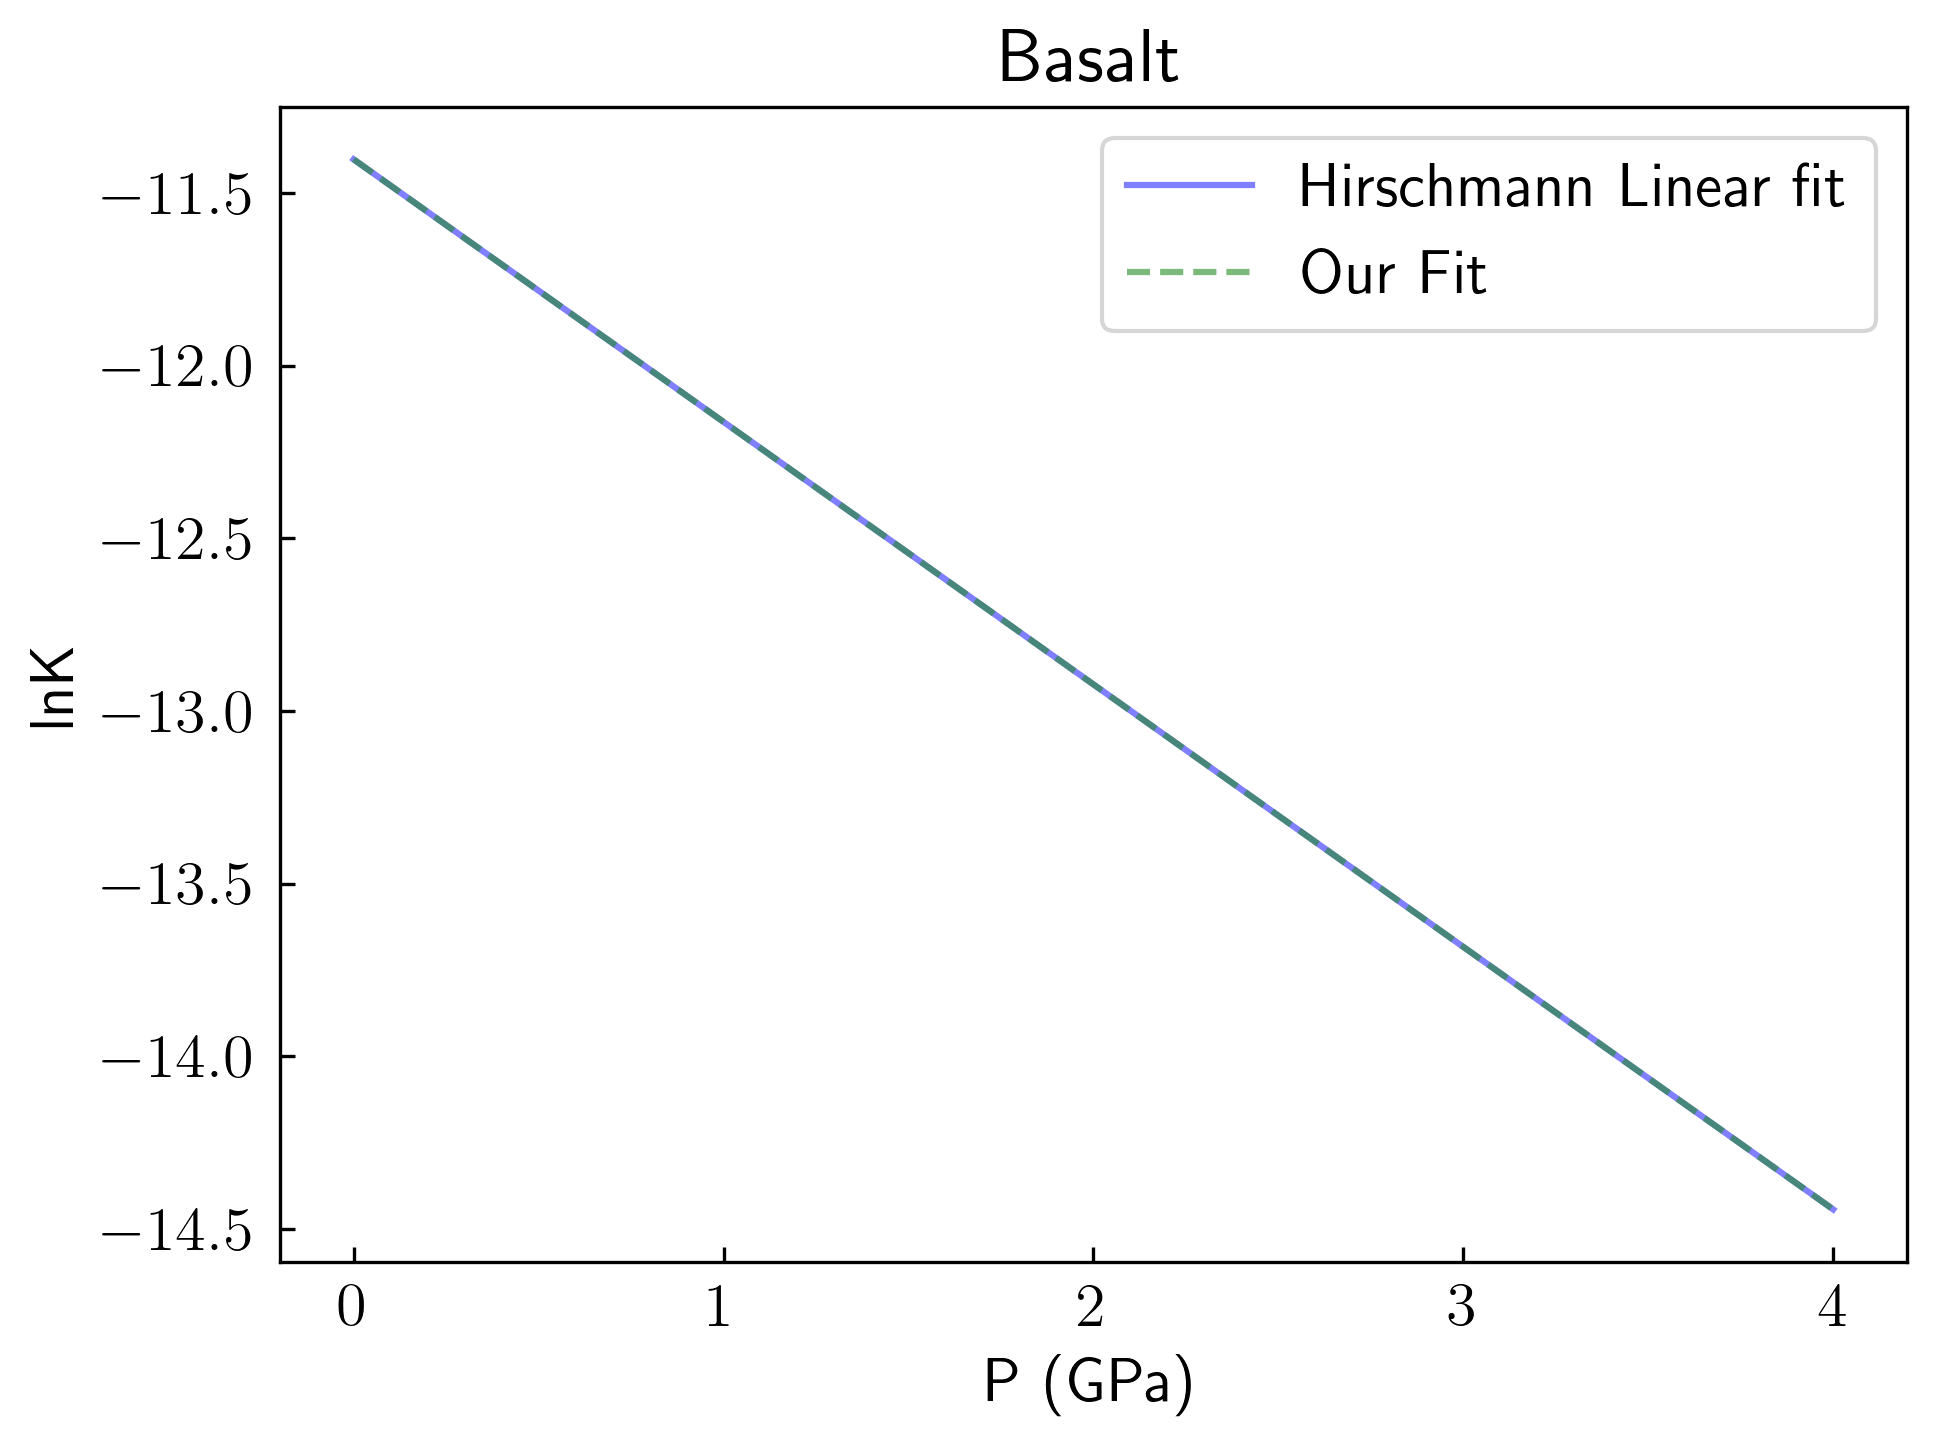

In [100]:
pressure_arr = np.arange(0,4.1, 0.1)
GPa_to_bar: float = 1e4 #bar/GPa
fig, ax = plt.subplots()
plt.plot(pressure_arr, -11.403 - (0.76*pressure_arr), color='blue', alpha=0.5, label='Hirschmann Linear fit')
#plt.plot(pressure_arr, np.log((H2_HirschmannFig4(pressure_arr*GPa_to_bar)/1e6)/((25766.1717*pressure_arr) - 18763.4756)), color='forestgreen', linestyle='--', alpha=0.6, label='Our Fit')
plt.plot(pressure_arr, np.log((H2_HirschmannFig4(pressure_arr*GPa_to_bar)/1e6)/((7977.1995*(pressure_arr**2)) - 1667.9626*pressure_arr + 1363.7547)), color='forestgreen', linestyle='--', alpha=0.6, label='Our Fit')
plt.legend()
plt.ylabel('lnK')
plt.xlabel('P (GPa)')
plt.title('Basalt')
plt.show()


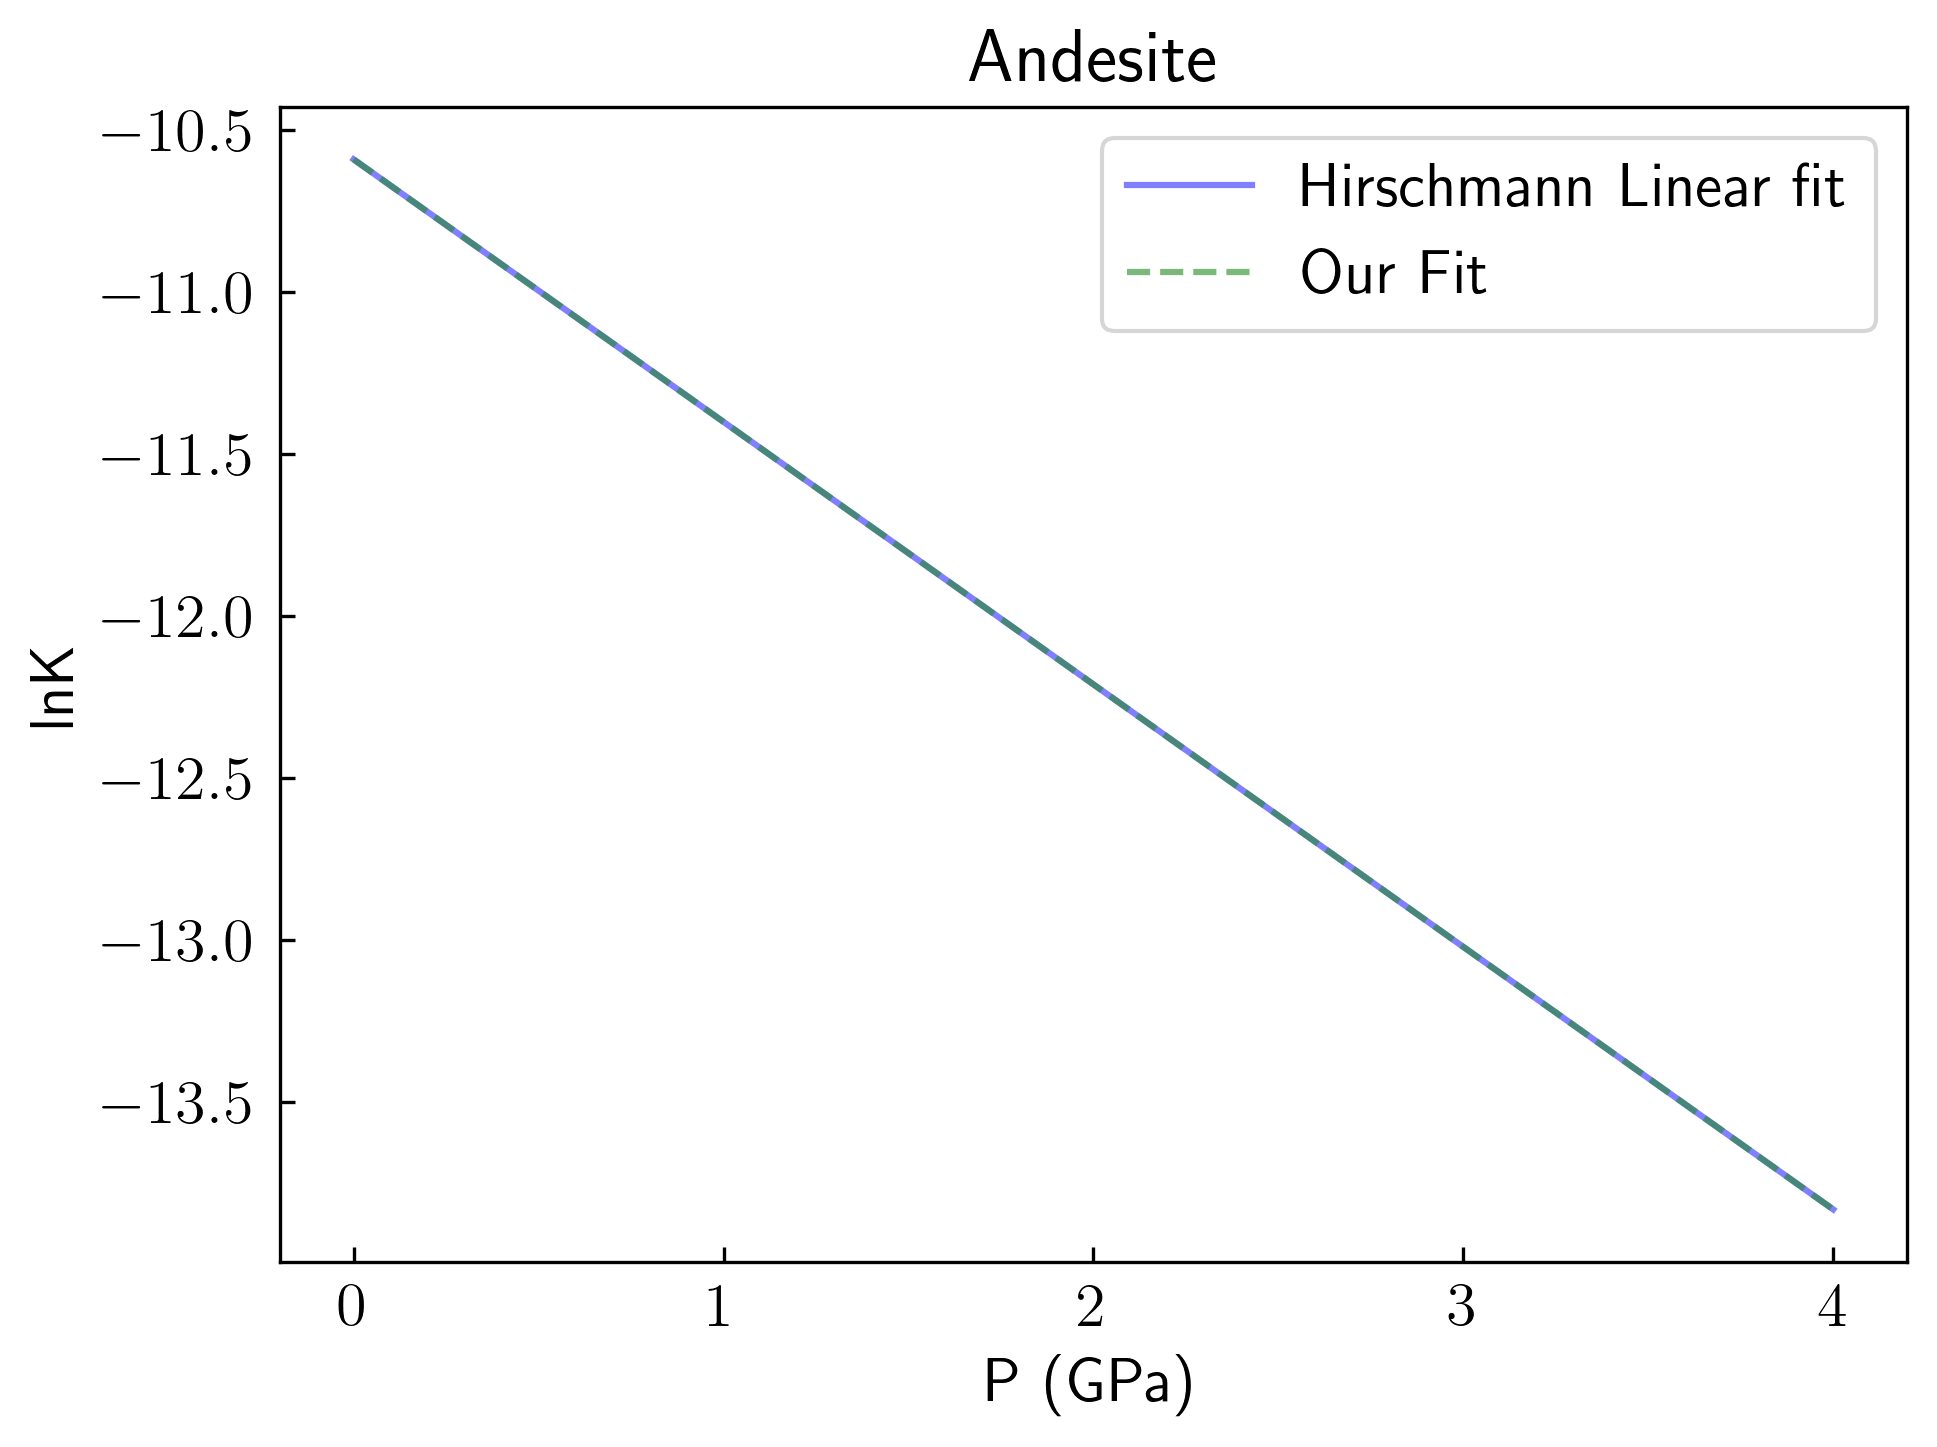

In [105]:
fig, ax = plt.subplots()
plt.plot(pressure_arr, -10.591 - (0.81*pressure_arr), color='blue', alpha=0.5, label='Hirschmann Linear fit')
#plt.plot(pressure_arr, np.log((H2_HirschmannFig4(pressure_arr*GPa_to_bar)/1e6)/((25766.1717*pressure_arr) - 18763.4756)), color='forestgreen', linestyle='--', alpha=0.6, label='Our Fit')
plt.plot(pressure_arr, np.log((H2_HirschmannFig4_Andesite(pressure_arr*GPa_to_bar)/1e6)/((11356.1024*(pressure_arr**2)) - 6604.1468*pressure_arr + 2897.5700)), color='forestgreen', linestyle='--', alpha=0.6, label='Our Fit')
plt.legend()
plt.ylabel('lnK')
plt.xlabel('P (GPa)')
plt.title('Andesite')
plt.show()

# Sulfur Solubility

## SO2 Solubility (Boulliung & Wood 2022)

In [141]:
#Data gathered from Table 3 S(ppm) vs. temperature

def lsq_SO2vsT(filename:str, typeoffit:str):
    """Fit H2 solubility data from Hirschmann+2012 as a function of pressure
    
    Args:
        composition. The composition of the melt 

    Returns:
        The least-squares fit coefficients.
    """
    if typeoffit == 'linear':
        datafile: str = f"data/solubility_data/SO2/{filename}"
        df:pd.DataFrame = pd.read_csv(datafile, names=('T_K', 'S_ppm'))
        # Least squares fitting.
        Temp: np.ndarray = df['T_K'].to_numpy()
        S_arr: np.ndarray = df['S_ppm'].to_numpy()
        design_matrix: np.ndarray = Temp[:, np.newaxis]**[1, 0]
        #print('design matrix:', design_matrix)
        solution, _, _, _ = np.linalg.lstsq(design_matrix, S_arr, rcond=None)
    elif typeoffit == 'poly':
        print('still working')
        solution: np.ndarray = []
    return solution


 

In [142]:
a_NIB, b_NIB = lsq_SO2vsT('NIB_SvsT.csv', 'linear')

a_lb, b_lb = lsq_SO2vsT('LunarBasalt_SvsT.csv', 'poly')

a_and, b_and = lsq_SO2vsT('Andesite_SvsT.csv', 'linear')

still working


ValueError: not enough values to unpack (expected 2, got 0)

    T_K  S_ppm
0  1523    500
1  1573    220
2  1623     64
3  1673     87
4  1723     52
5  1773     25


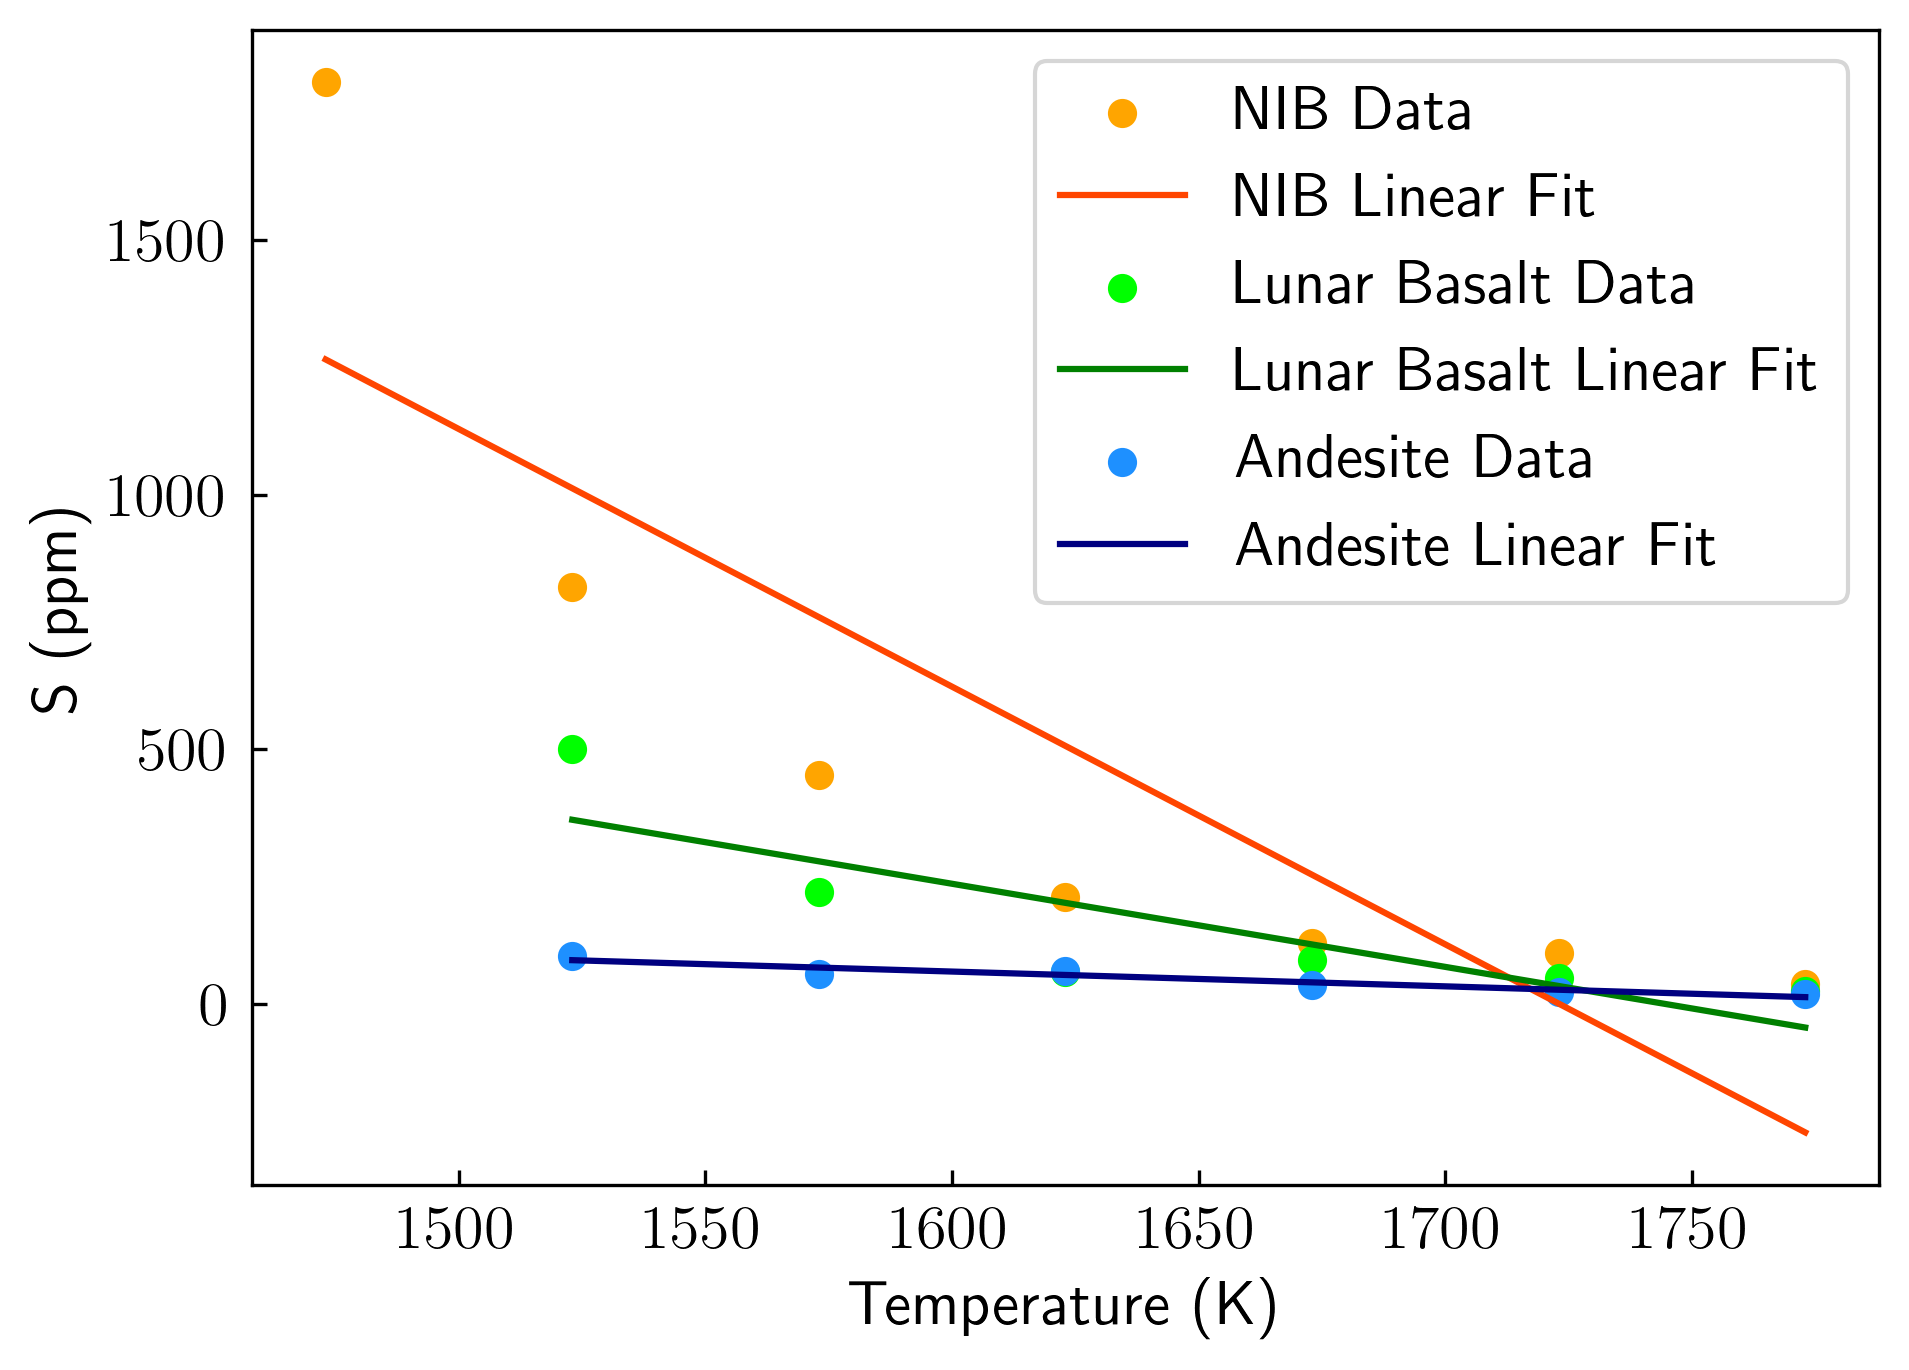

In [129]:
NIB_SvsT: str = f"data/solubility_data/SO2/NIB_SvsT.csv"
NIB_df:pd.DataFrame = pd.read_csv(NIB_SvsT, names=('T_K', 'S_ppm'))

LB_SvsT: str = f"data/solubility_data/SO2/LunarBasalt_SvsT.csv"
LB_df:pd.DataFrame = pd.read_csv(LB_SvsT, names=('T_K', 'S_ppm'))
print(LB_df)

And_SvsT: str = f"data/solubility_data/SO2/Andesite_SvsT.csv"
And_df:pd.DataFrame = pd.read_csv(And_SvsT, names=('T_K', 'S_ppm'))


fig, ax = plt.subplots()
plt.scatter(NIB_df.T_K, NIB_df.S_ppm, color='orange', label='NIB Data')
plt.plot(NIB_df.T_K, (NIB_df.T_K*a_NIB) + b_NIB, color='orangered', label='NIB Linear Fit')

plt.scatter(LB_df.T_K, LB_df.S_ppm, color='lime', label='Lunar Basalt Data')
plt.plot(LB_df.T_K, (LB_df.T_K*a_lb) + b_lb, color='green', label='Lunar Basalt Linear Fit')

plt.scatter(And_df.T_K, And_df.S_ppm, color='dodgerblue', label='Andesite Data')
plt.plot(And_df.T_K, (And_df.T_K*a_and) + b_and, color='navy', label='Andesite Linear Fit')

plt.xlabel('Temperature (K)')
plt.ylabel('S (ppm)')
plt.legend()
plt.show()